# **Partie 2 : Machine Learning**

Le machine learning, ou apprentissage automatique en français, est une branche de l'intelligence artificielle (IA) qui se concentre sur le développement de techniques permettant aux ordinateurs d'apprendre à partir de données. 

Plutôt que de programmer explicitement des règles ou des instructions, le machine learning permet aux systèmes informatiques de s'améliorer automatiquement à partir de l'expérience.

Le machine learning est divisé plusieurs sous-discipline dont les trois catégories principales sont les suivantes :
- **Apprentissage supervisé** : les données sont étiquetées avec la réponse correcte. Par exemple, un modèle d'apprentissage supervisé peut apprendre à identifier les chiens dans les images en étant entraîné sur un ensemble de données d'images étiquetées comme contenant des chiens ou non.

- **Apprentissage non supervisé** : les données ne sont pas étiquetées avec la réponse correcte. Le modèle doit apprendre à trouver des structures et des modèles dans les données. Par exemple, un modèle d'apprentissage non supervisé peut apprendre à identifier les chiens dans les images en recherchant des structures et des modèles dans les images qui sont similaires à des images étiquetées comme contenant des chiens.

- **Apprentissage par renforcement** : le modèle apprend à prendre des décisions en interagissant avec son environnement. Le modèle reçoit des récompenses pour les actions correctes et des pénalités pour les actions incorrectes. Le modèle doit ensuite apprendre à maximiser les récompenses et à minimiser les pénalités. Par exemple, un modèle d'apprentissage par renforcement peut apprendre à jouer à un jeu vidéo en essayant différentes actions et en observant les récompenses et les pénalités reçues pour chaque action.

<img src='https://www.researchgate.net/publication/354960266/figure/fig1/AS:1075175843983363@1633353305883/The-main-types-of-machine-learning-Main-approaches-include-classification-and.png' width=5000>


Dans ce notebook, nous allons nous concentrer sur l'apprentissage supervisé. Nous allons apprendre à construire des modèles d'apprentissage supervisé pour résoudre des problèmes de classification.

Nous utiliserons le jeu de données nettoyé dans la partie 1, pour rappel, il s'agit d'un ensemble de données synthétiques qui contient des informations sur les clients d'une entreprise. L'objectif est de prédire le statut marital de chaque client en fonction de ses caractéristiques.

Ce notebook est divisé en 3 parties :
1. Préparation des données
2. Entraînement & Evaluation des modèles de Machine Learning
3. Conception de modèles Deep Learning

Nous utiliserons les librairies suivantes :
- **[Pandas](https://pandas.pydata.org/)** : pour la manipulation des données
- **[Scikit-learn](https://scikit-learn.org/stable)** : pour la modélisation des modèles de machine learning
- **[Tensorflow](https://www.tensorflow.org/)** : pour la modélisation des modèles de deep learning

In [1]:
# Import des librairies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


df = pd.read_csv('data_clean.csv')
df

,Gender,Ever_Married,Age,Graduated,Work_Experience,Family_Size,Segmentation,Profession_Artist,Profession_Doctor,Profession_Engineer,...,Spending_Score_Average,Spending_Score_High,Spending_Score_Low,Var_1_Cat_1,Var_1_Cat_2,Var_1_Cat_3,Var_1_Cat_4,Var_1_Cat_5,Var_1_Cat_6,Var_1_Cat_7
0,0,1,22,1,1.0,4.0,0,0,0,0,...,0,0,1,0,0,0,1,0,0,0
1,1,0,67,0,1.0,1.0,3,0,0,1,...,0,0,1,0,0,0,0,0,1,0
2,0,0,67,0,0.0,2.0,3,0,0,0,...,0,1,0,0,0,0,0,0,1,0
3,0,0,56,1,0.0,2.0,1,1,0,0,...,1,0,0,0,0,0,0,0,1,0
4,0,1,32,0,1.0,3.0,1,0,0,0,...,0,0,1,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6660,0,0,41,0,0.0,5.0,3,1,0,0,...,0,1,0,0,0,0,0,0,1,0
6661,0,1,35,1,3.0,4.0,0,0,0,0,...,0,0,1,0,0,0,1,0,0,0
6662,1,1,33,0,1.0,1.0,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0
6663,1,1,27,0,1.0,4.0,3,0,0,0,...,0,0,1,0,0,0,0,0,1,0


# 1. Préparation des données

Cette première partie consiste à préparer les données pour l'entraînement des modèles de machine learning. Nous allons donc :
- Séparer les variables explicatives de la variable cible
- Séparer les données en deux ensembles : un ensemble d'entraînement et un ensemble de test
- Standardiser les variables explicatives : cela consiste à centrer et réduire les variables explicatives pour qu'elles aient une moyenne de 0 et un écart-type de 1. Cela permet d'améliorer les performances des modèles de machine learning.

In [2]:
# Séparation des données en X et y
X = df.drop(['Ever_Married'], axis=1)
y = df['Ever_Married']

In [3]:
# Standardisation des données
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X = scaler.fit_transform(X)

In [4]:
# Séparation des données en train et test
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=df['Ever_Married'])

In [5]:
X.shape

(6665, 25)

In [6]:
y.shape

(6665,)

In [7]:
y[0]

1

# 2. Entrainement d'un modèle supervisé de classification : [K-Nearest Neighbors](https://en.wikipedia.org/wiki/K-nearest_neighbors_algorithm)

L'algorithme des k-plus proches voisins est un algorithme d'apprentissage supervisé. Il peut être utilisé pour la classification ou la régression. Dans les deux cas, l'entrée se compose des $k$ exemples d'entraînement les plus proches dans l'espace des caractéristiques. L'entrée est attribuée à la classe la plus fréquente parmi les $k$ exemples d'entraînement les plus proches (classification) ou la valeur moyenne de ces $k$ exemples (régression).


<img src='https://upload.wikimedia.org/wikipedia/commons/thumb/e/e7/KnnClassification.svg/440px-KnnClassification.svg.png'>


### Distance entre deux points

La distance euclidienne $(d)$ entre deux points $(x_i)$ et $(x_j)$ dans l'espace des caractéristiques $X$ est définie par :

$$d(x_i, x_j) =\sqrt{\sum_{k=1}^{m}(x_{i,k} - x_{j,k})^2}$$

- $(X)$ : Espace des caractéristiques (variables d'entrée)
- $(Y)$ : Espace des étiquettes (classes ou valeurs de sortie)
- $(D)$ : Ensemble des données d'entraînement $D = {\{(x_1, y_1), (x_2, y_2), ..., (x_n, y_n)}\}$


### Voisinage

Le voisinage $N_k(x)$ est l'ensemble des $k$ voisins les plus proches de $x$ dans l'ensemble d'entraînement $D$, déterminé par la distance euclidienne.

$$N_k(x) = \{x_i \in D \ | \ d(x, x_i) \ \text{est parmi les k plus petites}\}$$

### Classification

Pour la classification, la classe majoritaire parmi les $k$ voisins est attribuée à $x$.

$$y = \underset{y_i}{\text{argmax}} \sum_{x_i \in N_k(x)} I(y_i = y)$$

### Régression

Pour la régression, la valeur prédite pour $x$ est la moyenne des valeurs cibles des $k$ voisins.

$$y = \frac{1}{k} \sum_{x_i \in N_k(x)} y_i$$

### Choix de $(k)$

Le paramètre $k$ est crucial. Il peut être choisi par validation croisée ou d'autres méthodes. Un $k$ trop petit peut être sensible au bruit, tandis qu'un $k$ trop grand peut rendre l'algorithme trop général.


### Avantages

- Simple à comprendre et à mettre en œuvre
- Peu de paramètres à régler
- Peut être utilisé pour la classification et la régression

### Inconvénients

- Lent à prédire de nouvelles instances
- Nécessite beaucoup de mémoire
- Sensible aux caractéristiques non pertinentes et aux valeurs aberrantes

### Import depuis scikit-learn

La classe [KNeighborsClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html) de scikit-learn implémente l'algorithme des k-plus proches voisins pour la classification.


In [8]:
# Import du modèle KNN de la bibliothèque sklearn
from sklearn.neighbors import KNeighborsClassifier

# Instanciation du modèle KNN avec 3 voisins
knn = KNeighborsClassifier(n_neighbors=3)

In [9]:
# Entraînement du modèle
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [10]:
# Prédiction sur les données de test
y_pred = knn.predict(X_test)
y_pred

array([1, 0, 0, ..., 1, 1, 0])

## 2. [Métriques d'évaluation](https://scikit-learn.org/stable/modules/classes.html#module-sklearn.metrics) des modèles de classification

Il existe plusieurs métriques adaptées à l'évaluation de modèles de classification multiclasse. Le choix de la métrique dépend souvent de la nature spécifique de votre problème et de ce que vous souhaitez prioriser dans l'évaluation du modèle. Voici quelques métriques couramment utilisées pour la classification multiclasse :

1. **Matrice de Confusion :** Elle présente le nombre de prédictions correctes et incorrectes pour chaque classe, offrant une vue détaillée des performances du modèle.

2. **Précision (Precision) :** Mesure la proportion de prédictions positives correctes parmi l'ensemble des prédictions positives. Elle se calcule comme le rapport entre les vrais positifs et la somme des vrais positifs et des faux positifs.

   $\text{Précision} = \frac{\text{Vrais Positifs}}{\text{Vrais Positifs + Faux Positifs}}$

3. **Rappel (Recall) :** Mesure la proportion de vrais positifs parmi l'ensemble des exemples réellement positifs. Il se calcule comme le rapport entre les vrais positifs et la somme des vrais positifs et des faux négatifs.

   $\text{Rappel} = \frac{\text{Vrais Positifs}}{\text{Vrais Positifs + Faux Négatifs}}$

4. **F1 Score :** Il combine la précision et le rappel en une seule métrique en calculant leur moyenne harmonique. C'est particulièrement utile lorsque vous souhaitez trouver un équilibre entre la précision et le rappel.

   $\text{F1 Score} = 2 \times \frac{\text{Précision} \times \text{Rappel}}{\text{Précision + Rappel}}$

5. **Exactitude (Accuracy) :** Mesure la proportion totale de prédictions correctes parmi toutes les prédictions. C'est une métrique simple mais peut être trompeuse si les classes ne sont pas équilibrées.

   $\text{Exactitude} = \frac{\text{Vrais Positifs + Vrais Négatifs}}{\text{Total de Prédictions}}$

6. **Log Loss :** Cette métrique mesure la performance du modèle en termes de probabilités prédites par rapport aux vraies étiquettes. Elle est souvent utilisée dans les problèmes de classification probabiliste.

   $\text{Log Loss} = -\frac{1}{N}\sum_{i=1}^{N}\sum_{j=1}^{M}y_{ij} \log(p_{ij})$

   où $N$ est le nombre d'observations, $M$ est le nombre de classes, $y_{ij}$ est un indicateur binaire de la classe réelle, et $p_{ij}$ est la probabilité prédite d'appartenir à la classe $j$.

7. **AUC-ROC (Area Under the Receiver Operating Characteristic curve) :** Cette métrique évalue la capacité du modèle à distinguer les différentes classes. Elle est particulièrement utile lorsque les classes sont déséquilibrées.

Il est recommandé d'utiliser une combinaison de ces métriques en fonction de la nature spécifique de votre problème et de vos objectifs d'évaluation.


In [11]:
# Import de la fonction accuracy_score de la bibliothèque sklearn
from sklearn.metrics import accuracy_score

acc = accuracy_score(y_test, y_pred)
print(f'Accuracy: {acc}')

Accuracy: 0.8447111777944486


In [12]:
# Import de la fonction f1_score de la bibliothèque sklearn
from sklearn.metrics import f1_score

f1 = f1_score(y_test, y_pred, average='weighted')
print(f'F1-Score: {f1}')

F1-Score: 0.8453062850743644


In [13]:
# Import de la fonction  classification_report de la bibliothèque sklearn
from sklearn.metrics import classification_report

print( "Rapport de classification: ")
print(classification_report(y_test, y_pred))

Rapport de classification: 
              precision    recall  f1-score   support

           0       0.88      0.85      0.87       789
           1       0.79      0.84      0.82       544

    accuracy                           0.84      1333
   macro avg       0.84      0.84      0.84      1333
weighted avg       0.85      0.84      0.85      1333



In [14]:
# Matrice de confusion
from sklearn.metrics import confusion_matrix

print("Matrice de confusion: \n")
print(confusion_matrix(y_test, y_pred))

Matrice de confusion: 

[[670 119]
 [ 88 456]]


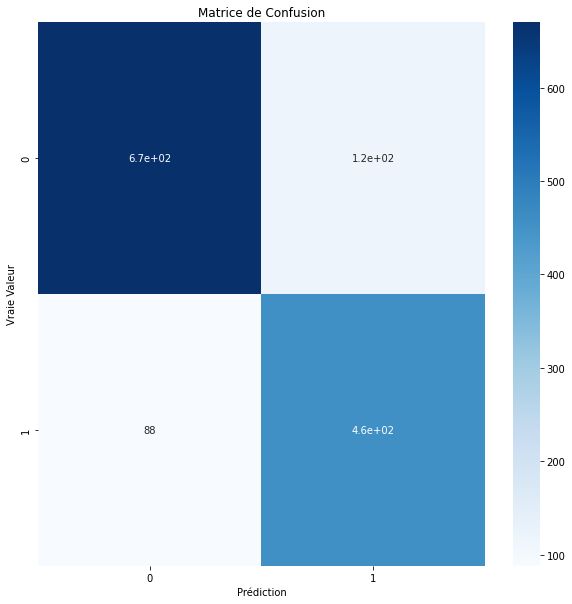

In [15]:
# Graphique de la matrice de confusion
plt.figure(figsize=(10, 10))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, cmap='Blues')
plt.title('Matrice de Confusion')
plt.xlabel('Prédiction')
plt.ylabel('Vraie Valeur')
plt.show()

## Optimisation des hyperparamètres [Grid Search](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html)

Les hyperparamètres sont des paramètres qui ne sont pas appris par le modèle. Ils sont définis avant le début du processus d'apprentissage. Ils sont souvent optimisés par recherche par grille ou par recherche aléatoire.

La classe [GridSearchCV](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html) de scikit-learn implémente la recherche par grille pour l'optimisation des hyperparamètres.

La cross-validation est utilisée pour évaluer les performances de chaque combinaison d'hyperparamètres. La combinaison d'hyperparamètres qui donne les meilleures performances est sélectionnée. 

<img src='https://scikit-learn.org/stable/_images/grid_search_cross_validation.png'>

In [16]:
# Import du module GridSearchCV de la bibliothèque sklearn
from sklearn.model_selection import GridSearchCV

# Définition des paramètres du modèle knn
param_grid = {'n_neighbors': [3, 5, 7, 9, 11, 13, 15],
                'weights': ['uniform', 'distance'],
                'metric': ['euclidean', 'manhattan']
              }

# Unifom : tous les points de chaque voisin ont le même poids
# Distance : les points les plus proches ont un poids plus important

# Définition du modèle knn dans la variable knn
knn = KNeighborsClassifier()

# Définition du modèle GridSearchCV dans la variable grid_search
grid_search = GridSearchCV(knn, param_grid, scoring='recall_macro', cv=5, n_jobs=-1, verbose=1)

# Entraînement du modèle grid_search
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid={'metric': ['euclidean', 'manhattan'],
                         'n_neighbors': [3, 5, 7, 9, 11, 13, 15],
                         'weights': ['uniform', 'distance']},
             scoring='recall_macro', verbose=1)

In [17]:
# Affichage des meilleurs paramètres
grid_search.best_params_

{'metric': 'manhattan', 'n_neighbors': 15, 'weights': 'uniform'}

In [18]:
y_pred = grid_search.predict(X_test)
acc = accuracy_score(y_test, y_pred)
print(f'Accuracy: {acc}')

Accuracy: 0.8619654913728432


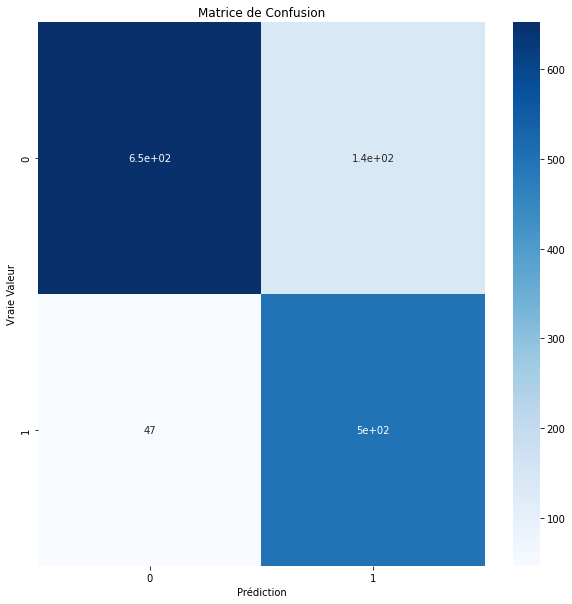

In [19]:
# Graphique de la matrice de confusion
plt.figure(figsize=(10, 10))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, cmap='Blues')
plt.title('Matrice de Confusion')
plt.xlabel('Prédiction')
plt.ylabel('Vraie Valeur')
plt.show()

## 3. [Régression Logistique](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html)

La régression logistique est un algorithme d'apprentissage supervisé utilisé pour résoudre des problèmes de classification. Elle est adaptée aux tâches de classification binaire et multiclasse.

<img src='https://upload.wikimedia.org/wikipedia/commons/thumb/c/cb/Exam_pass_logistic_curve.svg/800px-Exam_pass_logistic_curve.svg.png'>

## Principe de la Régression Logistique

1. **Fonction Logistique (Sigmoïde) :** La régression logistique utilise une fonction logistique, également appelée fonction sigmoïde, pour modéliser la probabilité qu'une observation appartienne à une classe particulière. La fonction sigmoïde a la forme :

   $$f(x) = \frac{1}{1 + e^{-x}}$$

   Cette fonction transforme toute valeur réelle en une plage entre 0 et 1.

2. **Probabilité et Décision :** Une fois que le modèle a calculé la probabilité d'appartenance à une classe, une décision est prise en fonction d'un seuil. Si la probabilité est supérieure au seuil, l'observation est classée dans la classe positive ; sinon, elle est classée dans la classe négative.

## Équation de la Régression Logistique Binaire

La régression logistique binaire peut être exprimée mathématiquement comme suit :

$$p(Y=1|X) = \frac{1}{1 + e^{-(\beta_0 + \beta_1 X_1 + \beta_2 X_2 + ... + \beta_n X_n)}}$$

où :
- $p(Y=1|X)$ est la probabilité que la classe soit 1 (positive) étant donné l'ensemble de caractéristiques $X$.
- $\beta_0$ est le terme de biais.
- $\beta_1, \beta_2, ..., \beta_n$ sont les coefficients associés aux caractéristiques $X_1, X_2, ..., X_n$.

## Entraînement de la Régression Logistique

L'entraînement de la régression logistique implique l'ajustement des coefficients ($\beta$) en utilisant des techniques d'optimisation pour maximiser la vraisemblance du modèle par rapport aux données d'entraînement.

## Applications

La régression logistique est largement utilisée dans divers domaines, tels que la prédiction de la probabilité de défaut de paiement, la détection de spam, la classification de patients en fonction de leurs symptômes, etc.


In [20]:
# Import du modèle
from sklearn.linear_model import LogisticRegression


# Deffinition du modèle dans la variable lf
lr = LogisticRegression()

# Entraînement du modèle
lr.fit(X_train, y_train.values)

# Prédiction
y_pred = lr.predict(X_test)

# Calcul de l'accuracy
accuracy_score(y_test, y_pred)

0.8717179294823706

In [21]:
# Coefficients du modèle
lr.coef_

array([[ 0.34225456, -1.61004317, -0.01806573,  0.00587273, -0.06481691,
        -0.16874824, -0.06533155,  0.05998521, -0.14177214, -0.03934833,
        -0.32128439,  0.32139514, -0.02476392,  0.1372312 ,  0.00563372,
        -1.57505456, -1.1458555 ,  2.22761691, -0.10266039,  0.21569436,
        -0.03639117, -0.0811776 , -0.04443412,  0.02112455, -0.02364173]])

Text(69.0, 0.5, 'Vraie Valeur')

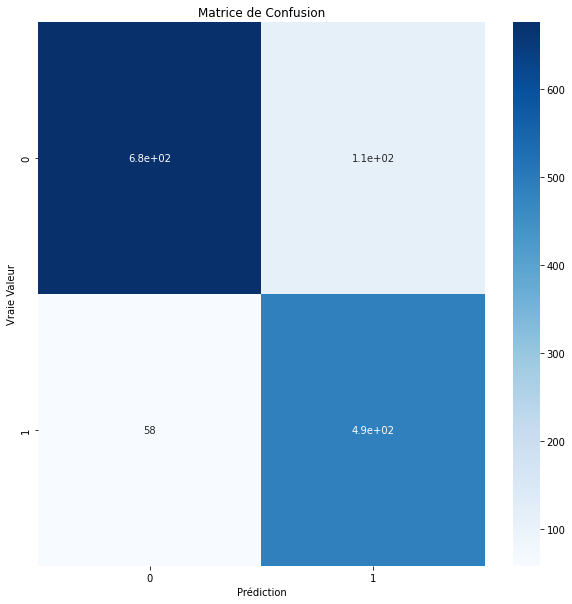

In [22]:
# Graphique de la matrice de confusion
plt.figure(figsize=(10, 10))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, cmap='Blues')
plt.title('Matrice de Confusion')
plt.xlabel('Prédiction')
plt.ylabel('Vraie Valeur')

# 4. [Decision Tree Classifier](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html)

Le `DecisionTreeClassifier` est un algorithme d'apprentissage supervisé utilisé pour résoudre des problèmes de classification. Il appartient à la famille des arbres de décision, qui sont des modèles basés sur la prise de décision séquentielle.

<img src='https://miro.medium.com/v2/resize:fit:663/1*xGsYc6aXehD7lyoLEn-mMA.png'>

## Principe du Decision Tree

1. **Arbre de Décision :** Un arbre de décision est une structure arborescente composée de nœuds de décision et de feuilles. Chaque nœud de décision teste une caractéristique, et chaque branche représente le résultat de ce test.

2. **Apprentissage :** L'algorithme apprend à diviser les données d'entraînement en fonction des caractéristiques pour maximiser la pureté des nœuds. Cela se fait récursivement jusqu'à ce que chaque feuille contienne des exemples d'une seule classe.

## Avantages

- **Interprétabilité :** Les arbres de décision sont faciles à interpréter et à visualiser, ce qui en fait un outil précieux pour comprendre les décisions du modèle.

- **Aucune Normalisation :** Aucune normalisation des caractéristiques n'est nécessaire, ce qui peut être un avantage lorsque les données ont des échelles différentes.

## Inconvénients

- **Surajustement :** Les arbres de décision peuvent avoir tendance à surajuster les données d'entraînement, ce qui signifie qu'ils peuvent être trop complexes et ne pas généraliser correctement sur de nouvelles données.

In [23]:
# Import du modèle DecisionTreeClassifier de la bibliothèque sklearn


# Définition du modèle DecisionTreeClassifier dans la variable dt


# Entraînement du modèle


# Prédiction


# Calcul de l'accuracy



# Graphique de la matrice de confusion


## 5. Deep Learning : Le [Perceptron](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Perceptron.html#sklearn.linear_model.Perceptron)

Un perceptron est un algorithme d'apprentissage automatique supervisé. Il a été développé dans les années 1950 et est considéré comme la plus petite unité de base dans un réseau de neurones.

Un neurone est la cellule de base du système nerveux, responsable de la transmission de l'information électrique dans le corps. Un neurone est constitué de trois parties principales : le corps cellulaire, les dendrites et l'axone. Les dendrites reçoivent les signaux électriques provenant d'autres neurones ou de l'environnement, et les transmettent au corps cellulaire. Le corps cellulaire intègre les signaux entrants et, si la somme de ces signaux dépasse un seuil de déclenchement, il envoie un signal électrique le long de l'axone, qui transmet l'information à d'autres neurones.


<img src='https://appliedgo.net/media/perceptron/neuron.png'>

Les perceptrons sont une abstraction simplifiée des neurones biologiques. Il a été proposé par Frank Rosenblatt en 1957. Il s'agit d'un modèle de neurone artificiel qui peut être utilisé pour résoudre des problèmes de classification binaire. Il prend plusieurs entrées binaires $(x_1, x_2, \ldots, x_n)$ et produit une seule sortie binaire $(y)$. La formule du perceptron peut être exprimée comme suit :

$$y = \text{H}(\sum_{i=1}^{n} w_i \cdot x_i + b)$$

- $\sum_{i=1}^{n} w_i \cdot x_i$ représente la somme pondérée des entrées $(x_i)$ avec leurs poids correspondants $(w_i)$.
- $b$ est le biais (ou terme de seuil).
- $\text{H}(z)$ est une fonction d'activation appelée fonction échelon, définie comme suit : 

$$\text{H}(z) = \begin{cases} 1, & \text{si } z \geq 0 \\ 0, & \text{sinon} \end{cases}$$

### Fonctionnement du Perceptron

1. Les entrées binaires $(x_i)$ sont multipliées par leurs poids correspondants $(w_i)$.
2. La somme pondérée est calculée en ajoutant ces produits.
3. Le biais $(b)$ est ajouté à cette somme.
4. Le résultat est passé à travers la fonction d'activation (fonction échelon) pour produire la sortie binaire du perceptron.

### Explication

Le perceptron est un algorithme d'apprentissage automatique classique qui a été largement étudié et utilisé, et il a posé les bases pour le développement de réseaux de neurones artificiels plus complexes. Il est utilisé pour résoudre des problèmes de classification binaire, tels que la classification des images, la détection de spam, etc.

In [24]:
# Pour rappel, X est la matrice des variables explicatives et y est le vecteur de la variable cible
print( "X.shape =", X.shape)
print( "y.shape =", y.shape)
print( "X[0] =", X[0])

X.shape = (6665, 25)
y.shape = (6665,)
X[0] = [-0.90145382 -1.30341502  1.32615687 -0.4784302   0.76011295 -1.29923992
 -0.70003673 -0.31221892 -0.30931614 -0.37168388 -0.2863224   2.27782496
 -0.16420889 -0.28478589 -0.19032899 -0.57636853 -0.42113397  0.81649658
 -0.12590172 -0.23965176 -0.32422759  2.61732922 -0.10595957 -1.4299543
 -0.15981987]


In [25]:
import random
import numpy as np

num_inputs = 25

# Initialisation des poids et du biais
weights = [random.uniform(-1,1) for _ in range(num_inputs)]
bias = random.uniform(-1,1)

In [26]:
z = (X[0]*weights).sum() + bias
z

-0.6302977159122229

In [27]:
# Définition de la fonction d'activation
def activation(z):
    return 1 if z >= 0 else 0

activation(z)

0

### Mise à Jour des Poids avec [Correction d'Erreur](https://fr.wikipedia.org/wiki/Perceptron#R%C3%A8gle_d'apprentissage_du_perceptron_(loi_de_Widrow-Hoff):~:text=R%C3%A8gle%20de%20Hebb-,R%C3%A8gle%20d%27apprentissage%20du%20perceptron%20(loi%20de%20Widrow%2DHoff),-Notes%20et%20r%C3%A9f%C3%A9rences)

Cette méthode est utilisée dans le contexte de l'apprentissage automatique supervisé, où un modèle ajuste ses paramètres pour minimiser l'erreur entre ses prédictions ($Y$) et les valeurs réelles ($Y_t$).

La formule de mise à jour des poids avec correction d'erreur est la suivante :

$ W'_i = W_i + \alpha \cdot (Y_t - Y) \cdot X_i $

- $ W_i $ : Poids actuel associé à la caractéristique (ou entrée) $X_i$.
- $ Y $ : La sortie prédite par le modèle.
- $ Y_t $ : La cible réelle ou la vérité terrain.
- $ X_i $ : La caractéristique (ou entrée) correspondante au poids $W_i$.
- $ \alpha $ : Le taux d'apprentissage, qui détermine la taille du pas de mise à jour.

Dans cette formule, $ (Y_t - Y) $ représente la correction d'erreur, indiquant la différence entre la sortie réelle ($Y_t$) et la sortie prédite ($Y$). La correction est alors utilisée pour ajuster les poids proportionnellement à la caractéristique ($X_i$). Le taux d'apprentissage ($\alpha$) contrôle l'amplitude des changements de poids.

Cette approche permet au modèle de s'ajuster plus précisément aux erreurs de prédiction, guidant ses poids vers des valeurs qui minimisent l'écart entre les prédictions et les véritables valeurs cibles.

In [28]:
# Mise à jour des poids et du biais
a = 0.5

weights = np.array(weights) + a *(y[0] - activation(z)) * X[0]
weights

array([ 0.0969025 , -0.26534892,  0.27110116,  0.06614645,  1.26735649,
       -0.71686762,  0.48350363,  0.49272085, -0.59725285, -0.10858757,
        0.81379537,  1.08929628,  0.82589846,  0.48214118, -1.00956377,
       -0.30159016, -1.05404566,  0.26423846, -1.05649215, -0.85244857,
        0.04218924,  1.52640564, -0.18636219, -0.80221714,  0.83545349])

In [29]:
import random
import numpy as np

# Initialisation des poids et du biais
# num_inputs est la dimension des données d'entrée (nombre de features de X)
# Les poids sont initialisés aléatoirement entre -1 et 1
# Le biais est initialisé aléatoirement entre -1 et 1

class Perceptron:
    def __init__(self, num_inputs):
        self.weights = [random.uniform(-1,1) for _ in range(num_inputs)]
        self.bias = random.uniform(-1,1)

    def pred(self, inputs):
        z = (np.array(self.weights) * np.array(inputs)).sum() + self.bias
        return 1 if z > 0 else 0

    def update(self, inputs, label, learning_rate):
        prediction = self.pred(inputs)
        error = label - prediction

        self.weights = np.array(self.weights) + np.array(inputs) * error * learning_rate
        self.bias += error * learning_rate

    def fit(self, X, y, epoch, alpha=0.1):
        accuracy = []
        for _ in range(epoch):
            for data in zip(X,y):
                self.update(data[0], data[1], alpha)
            y_pred = self.predict(X)
            accuracy.append(accuracy_score(y, y_pred))
        return accuracy


    def predict(self, X):
        return np.array([self.pred(x) for x in X])

In [30]:
# Instanciation du perceptron
perceptron = Perceptron(num_inputs=X.shape[1])

# Entraînement du perceptron
acc = perceptron.fit(X, y, 100, 0.1)

# Prédiction
y_pred = perceptron.predict(X)

# Calcul de l'accuracy
accuracy_score(y, y_pred)

0.8553638409602401

## 5. Deep Learning : Multi-Layer Perceptron (MLP)

## 5.1 - **Réseaux de neurones artificiels**
Un Multi Layer Perceptron (MLP) est un réseau de neurones artificiels composé de plusieurs couches de perceptron, où chaque neurone d'une couche est connecté à tous les neurones de la couche suivante. Les couches intermédiaires entre la couche d'entrée et la couche de sortie sont appelées couches cachées.

Chaque neurone d'un MLP utilise une fonction d'activation non linéaire pour transformer la somme pondérée des signaux d'entrée en une sortie. Les poids et les biais de chaque neurone sont appris par rétropropagation (backpropagation) lors de l'entraînement du réseau à partir d'un ensemble de données d'entraînement.

<img src='https://scikit-learn.org/stable/_images/multilayerperceptron_network.png'>

Un réseau de neuronnes est  caractérisé par :
- le nombre de couches qu'il contient,
- le nombre de neurones par couche,
- la fonction d'activation utilisée par chaque neurone.

<img src='https://upload.wikimedia.org/wikipedia/commons/thumb/a/ab/TensorFlow_logo.svg/1200px-TensorFlow_logo.svg.png'>

[TensorFlow](https://www.tensorflow.org/) est une bibliothèque open source de calcul numérique et de machine learning, développée par Google Brain Team. Elle permet de créer et d'entraîner des de deeplearning  pour diverses tâches telles que la classification, la reconnaissance d'image, la détection d'objet, la segmentation d'image, la génération de texte et bien plus encore.

Les modèles de deeplearning sont créés en assemblant des couches de neurones et en ajustant les poids de ces neurones lors de l'entraînement pour améliorer les performances du modèle. TensorFlow est utilisé dans de nombreuses industries et domaines, tels que la reconnaissance vocale, la robotique, la vision par ordinateur, la biologie, la finance, etc.

In [31]:
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential


def build_model(input_dim, output_dim=1):

    # On crée un modèle séquentiel
    model = Sequential()

    # Première couche cachée de 30 neurones
    model.add(Dense(30, input_dim=input_dim))

    # Deuxième couche cachée de 10 neurones
    model.add(Dense(10))

    # Couche de sortie de 1 neurone
    model.add(Dense(output_dim))

    return model


model = build_model(25, 1)

Metal device set to: Apple M1 Max

systemMemory: 32.00 GB
maxCacheSize: 10.67 GB



2023-12-05 17:09:22.949655: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2023-12-05 17:09:22.949780: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


In [32]:
# Architecture du modèle
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 30)                780       
                                                                 
 dense_1 (Dense)             (None, 10)                310       
                                                                 
 dense_2 (Dense)             (None, 1)                 11        
                                                                 
Total params: 1,101
Trainable params: 1,101
Non-trainable params: 0
_________________________________________________________________


In [33]:
# Poids du réseau de neurones
model.weights

[<tf.Variable 'dense/kernel:0' shape=(25, 30) dtype=float32, numpy=
 array([[-2.13875294e-01, -1.95870489e-01, -2.79060602e-02,
          6.27526641e-02,  2.22835600e-01,  6.74327612e-02,
         -2.51622707e-01, -2.70053059e-01,  5.16217947e-03,
          1.45935386e-01, -4.85885143e-02, -7.25021958e-02,
         -1.36118472e-01, -2.72331119e-01,  1.58994585e-01,
          1.51931345e-02,  1.47587359e-01,  3.26281130e-01,
         -2.78796881e-01,  3.10244143e-01, -1.33451149e-01,
         -6.23180568e-02,  2.03488708e-01,  1.62683398e-01,
          6.59951568e-02,  1.30458683e-01,  7.37144053e-02,
         -2.85304070e-01, -2.81399161e-01, -3.47201228e-02],
        [ 1.69521332e-01, -3.03849876e-01,  7.75687695e-02,
         -2.71110535e-02, -2.59499699e-01, -1.32582575e-01,
          2.21264124e-01,  8.11576545e-02, -1.27862394e-01,
         -1.84701398e-01, -2.34044552e-01, -2.46031195e-01,
         -1.57104492e-01,  2.12125301e-01,  3.16691697e-02,
          1.98860824e-01, -2.72

In [34]:
# Première couche cachée

model.layers[0]

In [35]:
# Mise à jour des poids de la première couche cachée True = trainable / False = non trainable
model.layers[0].trainable

True

## 4.2 **Fonction d'activation**

Une fonction d'activation est une fonction mathématique appliquée à la sortie d'un neurone dans un réseau de neurones artificiels. Elle introduit de la non-linéarité dans les sorties des neurones et permet ainsi au réseau de neurones de modéliser des relations complexes entre les entrées et les sorties.

Il existe plusieurs types de fonctions d'activation, chacune avec ses propres avantages et inconvénients. Voici quelques exemples de fonctions d'activation couramment utilisées :

- [Fonction sigmoïde](https://www.tensorflow.org/api_docs/python/tf/keras/activations/sigmoid) : une fonction en forme de S qui comprime les valeurs d'entrée entre 0 et 1, souvent utilisée pour la classification binaire ou la régression logistique.

<img src='https://upload.wikimedia.org/wikipedia/commons/thumb/9/96/SigmoidFunction.svg/2560px-SigmoidFunction.svg.png' width=300>

- [Fonction tangente hyperbolique](https://www.tensorflow.org/api_docs/python/tf/keras/activations/tanh) (tanh) : une fonction similaire à la fonction sigmoïde, mais qui comprime les valeurs d'entrée entre -1 et 1.

<img src='https://upload.wikimedia.org/wikipedia/commons/thumb/8/87/Hyperbolic_Tangent.svg/langfr-2880px-Hyperbolic_Tangent.svg.png' width=400>

- [Fonction ReLU](https://www.tensorflow.org/api_docs/python/tf/keras/activations/relu) (Rectified Linear Unit) : une fonction qui renvoie la valeur d'entrée si elle est positive, sinon renvoie 0. Cette fonction est souvent utilisée pour les réseaux de neurones profonds en raison de sa simplicité et de son efficacité.

<img src='https://upload.wikimedia.org/wikipedia/commons/thumb/f/fe/Activation_rectified_linear.svg/2880px-Activation_rectified_linear.svg.png' width=400>

- [Fonction softmax](https://www.tensorflow.org/api_docs/python/tf/keras/activations/softmax) : une fonction qui renvoie un vecteur de probabilités normalisées, souvent utilisée pour la classification multi-classes.

<img src='https://miro.medium.com/v2/resize:fit:480/1*5nKWsukS6lPR-7fHtlK2Rg.png'>

Le choix de la fonction d'activation dépend du type de problème de modélisation, du type de données en entrée et de la structure du réseau de neurones.

D'autres fonctions d'activation existent et peuvent être utilisées dans TensorFlow. Vous pouvez consulter la [documentation TensorFlow](https://www.tensorflow.org/api_docs/python/tf/keras/activations) pour plus d'informations.

In [36]:

def build_model(input_dim, output_dim=1):

    # On crée un modèle séquentiel
    model = Sequential()

    # Première couche cachée de 30 neurones
    model.add(Dense(30, input_dim=input_dim, activation='relu'))

    # Deuxième couche cachée de 10 neurones
    model.add(Dense(10, activation='relu'))

    # Couche de sortie de 1 neurone
    model.add(Dense(output_dim, activation='sigmoid'))

    return model


model = build_model(25, 1)

## 2. Fonction de coût et descente de gradient

<img src='https://i.stack.imgur.com/VIeBL.png' width=700>

### Fonction de coût
Une fonction de perte (ou fonction d'erreur) est une mesure utilisée pour évaluer la qualité des prédictions d'un modèle de machine learning. Elle calcule l'écart entre les sorties prédites par le modèle et les sorties attendues (étiquettes de classe) pour un ensemble de données d'entraînement.

L'objectif de l'apprentissage automatique est de minimiser cette fonction de perte, c'est-à-dire de trouver les paramètres du modèle qui minimisent l'écart entre les prédictions et les étiquettes de classe réelles.

La fonction de perte est spécifique au type de tâche de classification ou de régression que le modèle tente de résoudre :


**=> Pour de la classification binaire on retrouve :**
- l'entropie croisée binaire, Elle mesure l'écart entre la probabilité prédite de la classe positive et la valeur réelle de la classe. 
        
        loss = mean(- y_true * log(y_pred) - (1 - y_true) * log(1 - y_pred))

        `loss='binary_crossentropy'`

- la fonction de perte logistique, qui est similaire à l'entropie croisée binaire, mais qui est plus stable pour les valeurs de probabilité proches de 0 ou 1.

        `loss='log_loss'`

**=> Pour la classification multiclasse, on utilise souvent :**
- l'entropie croisée catégorielle, elle mesure la distance entre la distribution de probabilité de sortie du modèle et la distribution de probabilité des étiquettes réelles. 

        loss = mean(- sum(y_true * log(y_pred)))

        `loss='categorical_crossentropy'`

**=> Pour de la regression, on retrouve :**
- Erreur quadratique moyenne (Mean Squared Error), elle est calculée en prenant la moyenne des carrés des différences entre les valeurs de sortie prédites et les valeurs réelles. 

        loss = mean(mean((y_true - y_pred) ** 2))

        `loss='mean_squared_error'`

- Erreur absolue moyenne (Mean Absolute Error), elle mesure la moyenne des écarts absolus entre les valeurs prédites et les valeurs réelles. 

        loss = mean(mean(abs(y_true - y_pred)))

        `loss='mean_absolute_error'`

En plus de la fonction de perte, il existe également des fonctions de régularisation qui aident à prévenir le surapprentissage en ajoutant des pénalités à la fonction de perte pour les paramètres du modèle qui sont trop grands.

D'autre fonction de pertes existent et peuvent être utilisées dans TensorFlow. Vous pouvez consulter la [documentation TensorFlow](https://www.tensorflow.org/api_docs/python/tf/keras/losses) pour plus d'informations.

### [Descente de gradient](https://keras.io/api/optimizers/)

La descente de gradient est une technique d'optimisation utilisée pour minimiser une fonction de perte en ajustant les paramètres du modèle par rapport aux gradients de la fonction de perte. Elle est utilisée dans de nombreux algorithmes d'apprentissage automatique pour trouver les paramètres optimaux d'un modèle.

<img src='https://upload.wikimedia.org/wikipedia/commons/6/68/Gradient_ascent_%28surface%29.png'>

La descente de gradient est un algorithme d'optimisation qui agit sur les poids et les biais (ou "biais de neuronnes") du réseau de neurones.

L'objectif de la descente de gradient est de minimiser la fonction de perte du modèle en ajustant les poids et les biais du réseau de neurones. 

Pour ce faire, elle calcule le gradient de la fonction de perte par rapport à chaque poids et biais du réseau de neurones et utilise ce gradient pour ajuster progressivement les valeurs des poids et des biais dans la direction de la pente descendante de la fonction de perte.

Voici les optimiseurs disponibles dans TensorFlow :
- [`SGD`](https://keras.io/api/optimizers/sgd/) (Stochastic Gradient Descent) : l'algorithme de descente de gradient stochastique classique, qui met à jour les poids du modèle à chaque itération en fonction du gradient de la fonction de perte par rapport aux poids.

- [`Adam`](https://keras.io/api/optimizers/adam/) (Adaptive Moment Estimation) : un algorithme d'optimisation adaptatif qui utilise des estimations adaptatives des moments du premier et du second ordre pour mettre à jour les poids du modèle.

- [`RMSprop`](https://keras.io/api/optimizers/rmsprop/) (Root Mean Square Propagation) : un algorithme d'optimisation qui utilise une moyenne mobile du carré des gradients pour normaliser les mises à jour des poids.

- [`Adagrad`](https://keras.io/api/optimizers/adagrad/) (Adaptive Gradient Algorithm) : un algorithme d'optimisation qui adapte les taux d'apprentissage de chaque poids du modèle en fonction de l'historique des mises à jour.

- [`Adamax`](https://keras.io/api/optimizers/adamax/) (Adaptive Moment Estimation with infinity norm) : une variante d'Adam qui utilise la norme infinie pour normaliser les mises à jour des poids.

- [`Nadam`](https://keras.io/api/optimizers/Nadam/) (Nesterov-accelerated Adaptive Moment Estimation) : une variante d'Adam qui incorpore la méthode Nesterov Accelerated Gradient pour accélérer la convergence.

In [37]:
# On compile le modèle avec l'optimiseur 'sgd' et la métrique 'accuracy', et la fonction de perte 'binary_crossentropy'
model.compile(optimizer='sgd', loss= 'binary_crossentropy', metrics=['accuracy'])

# Entraînement du modèle
history = model.fit(X_train, y_train, epochs=100, batch_size=64, verbose=1,validation_data=(X_test, y_test))

2023-12-05 17:09:23.150859: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


Epoch 1/100


2023-12-05 17:09:23.335024: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
loc("mps_select"("(mpsFileLoc): /AppleInternal/Library/BuildRoots/495c257e-668e-11ee-93ce-926038f30c31/Library/Caches/com.apple.xbs/Sources/MetalPerformanceShadersGraph/mpsgraph/MetalPerformanceShadersGraph/Core/Files/MPSGraphUtilities.mm":294:0)): error: 'anec.gain_offset_control' op result #0 must be 4D/5D memref of 16-bit float or 8-bit signed integer or 8-bit unsigned integer values, but got 'memref<1x64x1x1xi1>'
loc("mps_select"("(mpsFileLoc): /AppleInternal/Library/BuildRoots/495c257e-668e-11ee-93ce-926038f30c31/Library/Caches/com.apple.xbs/Sources/MetalPerformanceShadersGraph/mpsgraph/MetalPerformanceShadersGraph/Core/Files/MPSGraphUtilities.mm":294:0)): error: 'anec.gain_offset_control' op result #0 must be 4D/5D memref of 16-bit float or 8-bit signed integer or 8-bit unsigned integer values, but got 'memref<1x64x1x1xi1>'
loc

 1/84 [..............................] - ETA: 37s - loss: 0.8430 - accuracy: 0.3750

loc("mps_select"("(mpsFileLoc): /AppleInternal/Library/BuildRoots/495c257e-668e-11ee-93ce-926038f30c31/Library/Caches/com.apple.xbs/Sources/MetalPerformanceShadersGraph/mpsgraph/MetalPerformanceShadersGraph/Core/Files/MPSGraphUtilities.mm":294:0)): error: 'anec.gain_offset_control' op result #0 must be 4D/5D memref of 16-bit float or 8-bit signed integer or 8-bit unsigned integer values, but got 'memref<1x64x1x1xi1>'
loc("mps_select"("(mpsFileLoc): /AppleInternal/Library/BuildRoots/495c257e-668e-11ee-93ce-926038f30c31/Library/Caches/com.apple.xbs/Sources/MetalPerformanceShadersGraph/mpsgraph/MetalPerformanceShadersGraph/Core/Files/MPSGraphUtilities.mm":294:0)): error: 'anec.gain_offset_control' op result #0 must be 4D/5D memref of 16-bit float or 8-bit signed integer or 8-bit unsigned integer values, but got 'memref<1x64x1x1xi1>'


84/84 [==============================] - ETA: 0s - loss: 0.7108 - accuracy: 0.5353

loc("mps_select"("(mpsFileLoc): /AppleInternal/Library/BuildRoots/495c257e-668e-11ee-93ce-926038f30c31/Library/Caches/com.apple.xbs/Sources/MetalPerformanceShadersGraph/mpsgraph/MetalPerformanceShadersGraph/Core/Files/MPSGraphUtilities.mm":294:0)): error: 'anec.gain_offset_control' op result #0 must be 4D/5D memref of 16-bit float or 8-bit signed integer or 8-bit unsigned integer values, but got 'memref<1x20x1x1xi1>'
loc("mps_select"("(mpsFileLoc): /AppleInternal/Library/BuildRoots/495c257e-668e-11ee-93ce-926038f30c31/Library/Caches/com.apple.xbs/Sources/MetalPerformanceShadersGraph/mpsgraph/MetalPerformanceShadersGraph/Core/Files/MPSGraphUtilities.mm":294:0)): error: 'anec.gain_offset_control' op result #0 must be 4D/5D memref of 16-bit float or 8-bit signed integer or 8-bit unsigned integer values, but got 'memref<1x20x1x1xi1>'
loc("mps_select"("(mpsFileLoc): /AppleInternal/Library/BuildRoots/495c257e-668e-11ee-93ce-926038f30c31/Library/Caches/com.apple.xbs/Sources/MetalPerformanceSh

84/84 [==============================] - 2s 13ms/step - loss: 0.7108 - accuracy: 0.5353 - val_loss: 0.6158 - val_accuracy: 0.6752
Epoch 2/100


loc("mps_select"("(mpsFileLoc): /AppleInternal/Library/BuildRoots/495c257e-668e-11ee-93ce-926038f30c31/Library/Caches/com.apple.xbs/Sources/MetalPerformanceShadersGraph/mpsgraph/MetalPerformanceShadersGraph/Core/Files/MPSGraphUtilities.mm":294:0)): error: 'anec.gain_offset_control' op result #0 must be 4D/5D memref of 16-bit float or 8-bit signed integer or 8-bit unsigned integer values, but got 'memref<1x64x1x1xi1>'
loc("mps_select"("(mpsFileLoc): /AppleInternal/Library/BuildRoots/495c257e-668e-11ee-93ce-926038f30c31/Library/Caches/com.apple.xbs/Sources/MetalPerformanceShadersGraph/mpsgraph/MetalPerformanceShadersGraph/Core/Files/MPSGraphUtilities.mm":294:0)): error: 'anec.gain_offset_control' op result #0 must be 4D/5D memref of 16-bit float or 8-bit signed integer or 8-bit unsigned integer values, but got 'memref<1x64x1x1xi1>'
loc("mps_select"("(mpsFileLoc): /AppleInternal/Library/BuildRoots/495c257e-668e-11ee-93ce-926038f30c31/Library/Caches/com.apple.xbs/Sources/MetalPerformanceSh

84/84 [==============================] - 1s 8ms/step - loss: 0.5701 - accuracy: 0.7204 - val_loss: 0.5323 - val_accuracy: 0.7314
Epoch 3/100
84/84 [==============================] - 1s 9ms/step - loss: 0.4924 - accuracy: 0.7598 - val_loss: 0.4652 - val_accuracy: 0.7629
Epoch 4/100
84/84 [==============================] - 1s 8ms/step - loss: 0.4305 - accuracy: 0.7886 - val_loss: 0.4132 - val_accuracy: 0.7869
Epoch 5/100
84/84 [==============================] - 1s 10ms/step - loss: 0.3843 - accuracy: 0.8083 - val_loss: 0.3750 - val_accuracy: 0.8042
Epoch 6/100
84/84 [==============================] - 1s 9ms/step - loss: 0.3508 - accuracy: 0.8241 - val_loss: 0.3485 - val_accuracy: 0.8305
Epoch 7/100
84/84 [==============================] - 1s 9ms/step - loss: 0.3266 - accuracy: 0.8426 - val_loss: 0.3301 - val_accuracy: 0.8432
Epoch 8/100
84/84 [==============================] - 1s 8ms/step - loss: 0.3100 - accuracy: 0.8543 - val_loss: 0.3175 - val_accuracy: 0.8440
Epoch 9/100
84/84 [=====

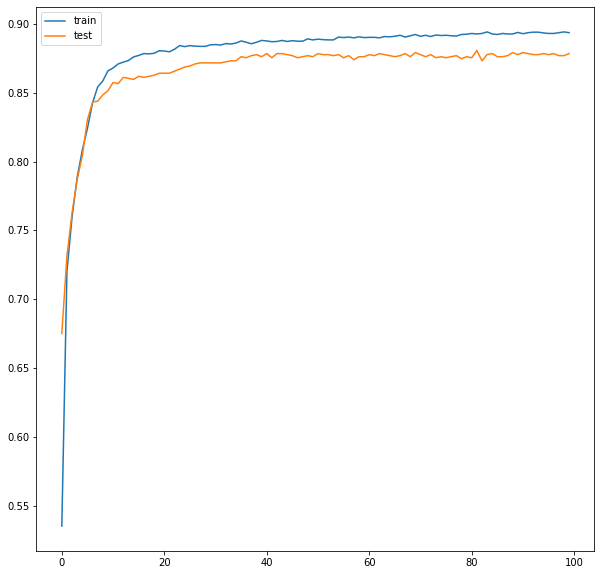

In [38]:
# Graphique d'évolution de l'accuracy durant l'entraînement

plt.figure(figsize=(10, 10))
plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='test')
plt.legend()
plt.show()

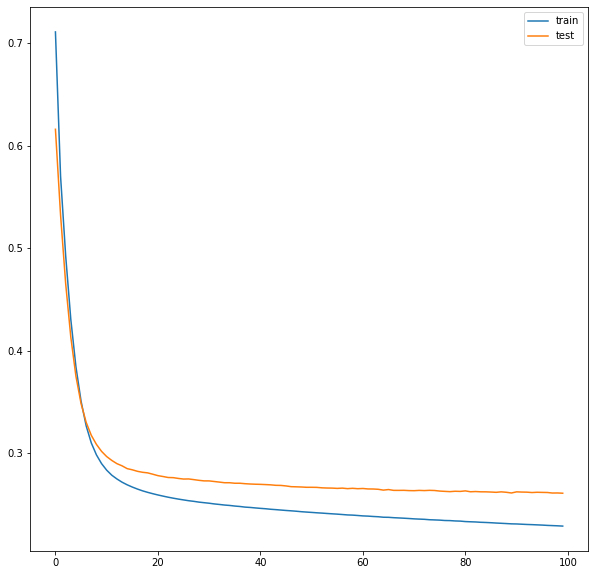

In [39]:
# Graphique d'évolution de la fonction de perte durant l'entraînement

plt.figure(figsize=(10, 10))
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()

In [40]:
# Prédiction
y_pred = model.predict(X_test)>0.5
y_pred

42/42 [==============================] - 0s 3ms/step


2023-12-05 17:10:32.199648: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


array([[ True],
       [ True],
       [False],
       ...,
       [False],
       [ True],
       [False]])

In [41]:
acc = accuracy_score(y_test, y_pred)
print(f'Accuracy: {acc}')

Accuracy: 0.878469617404351


Text(69.0, 0.5, 'Vraie Valeur')

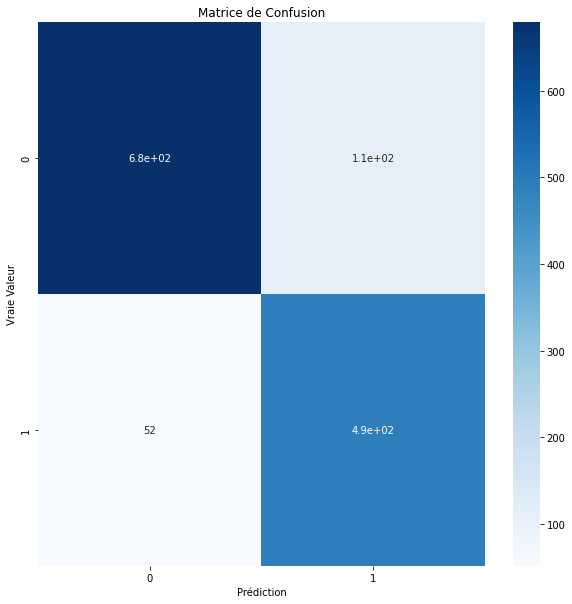

In [42]:
# Matrice de confusion
from sklearn.metrics import confusion_matrix

# Graphique de la matrice de confusion
plt.figure(figsize=(10, 10))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, cmap='Blues')
plt.title('Matrice de Confusion')
plt.xlabel('Prédiction')
plt.ylabel('Vraie Valeur')

In [43]:
# Sauvegarde du modèle
model.save('model.h5')

In [44]:
# Import du modèle
from tensorflow.keras.models import load_model

model_load = load_model('model.h5')

## Optimisation de l'entrainement 

### Callbacks

Les callbacks sont des fonctions qui peuvent être appelées à différents moments lors de l'entraînement d'un modèle. Ils peuvent être utilisés pour effectuer des actions telles que l'enregistrement des points de contrôle du modèle, l'arrêt de l'entraînement, l'enregistrement des journaux, etc.

### Early Stopping

L'arrêt précoce est une technique utilisée pour éviter le surapprentissage. Il consiste à arrêter l'entraînement du modèle lorsque la performance sur l'ensemble de validation commence à se détériorer, c'est-à-dire lorsque la perte sur l'ensemble de validation commence à augmenter.

In [45]:
# callbbacks
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

# ModelCheckpoint : permet de sauvegarder le modèle à chaque époque
checkpoint_callback = ModelCheckpoint(
    
    filepath='best_model.h5',                       # spécifiez le chemin où le modèle sera sauvegardé
    monitor='val_accuracy',                         # métrique à surveiller (par exemple, la précision sur l'ensemble de validation)
    save_best_only=True,                            # sauvegarde uniquement le modèle avec les meilleurs poids
    mode='max',                                     # le mode 'max' signifie que nous cherchons à maximiser la métrique surveillée
    verbose=1                                       # affiche un message lorsque le modèle est sauvegardé
)


# EarlyStopping : permet d'arrêter l'entraînement lorsque la métrique surveillée cesse de s'améliorer
early_stopping = EarlyStopping(monitor='val_loss', patience=10, verbose=1, mode='min')


# Compilez le modèle avec la configuration souhaitée (par exemple, l'optimiseur, la fonction de perte, etc.)
model.compile(optimizer='sgd', loss='binary_crossentropy', metrics=['accuracy'])

# Utilisez le rappel ModelCheckpoint lors de l'entraînement
model.fit(
    X_train, y_train,                               # spécifiez vos données d'entraînement
    epochs=100,                                     # nombre d'époques d'entraînement
    validation_data=(X_test, y_test),               # spécifiez vos données de validation
    callbacks=[early_stopping, checkpoint_callback]                 # utilisez le rappel ModelCheckpoint
)

Epoch 1/100


2023-12-05 17:10:32.631530: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
loc("mps_select"("(mpsFileLoc): /AppleInternal/Library/BuildRoots/495c257e-668e-11ee-93ce-926038f30c31/Library/Caches/com.apple.xbs/Sources/MetalPerformanceShadersGraph/mpsgraph/MetalPerformanceShadersGraph/Core/Files/MPSGraphUtilities.mm":294:0)): error: 'anec.gain_offset_control' op result #0 must be 4D/5D memref of 16-bit float or 8-bit signed integer or 8-bit unsigned integer values, but got 'memref<1x32x1x1xi1>'
loc("mps_select"("(mpsFileLoc): /AppleInternal/Library/BuildRoots/495c257e-668e-11ee-93ce-926038f30c31/Library/Caches/com.apple.xbs/Sources/MetalPerformanceShadersGraph/mpsgraph/MetalPerformanceShadersGraph/Core/Files/MPSGraphUtilities.mm":294:0)): error: 'anec.gain_offset_control' op result #0 must be 4D/5D memref of 16-bit float or 8-bit signed integer or 8-bit unsigned integer values, but got 'memref<1x32x1x1xi1>'
loc

167/167 [==============================] - ETA: 0s - loss: 0.2293 - accuracy: 0.8944

loc("mps_select"("(mpsFileLoc): /AppleInternal/Library/BuildRoots/495c257e-668e-11ee-93ce-926038f30c31/Library/Caches/com.apple.xbs/Sources/MetalPerformanceShadersGraph/mpsgraph/MetalPerformanceShadersGraph/Core/Files/MPSGraphUtilities.mm":294:0)): error: 'anec.gain_offset_control' op result #0 must be 4D/5D memref of 16-bit float or 8-bit signed integer or 8-bit unsigned integer values, but got 'memref<1x20x1x1xi1>'
loc("mps_select"("(mpsFileLoc): /AppleInternal/Library/BuildRoots/495c257e-668e-11ee-93ce-926038f30c31/Library/Caches/com.apple.xbs/Sources/MetalPerformanceShadersGraph/mpsgraph/MetalPerformanceShadersGraph/Core/Files/MPSGraphUtilities.mm":294:0)): error: 'anec.gain_offset_control' op result #0 must be 4D/5D memref of 16-bit float or 8-bit signed integer or 8-bit unsigned integer values, but got 'memref<1x20x1x1xi1>'
loc("mps_select"("(mpsFileLoc): /AppleInternal/Library/BuildRoots/495c257e-668e-11ee-93ce-926038f30c31/Library/Caches/com.apple.xbs/Sources/MetalPerformanceSh


Epoch 1: val_accuracy improved from -inf to 0.88222, saving model to best_model.h5
167/167 [==============================] - 2s 10ms/step - loss: 0.2293 - accuracy: 0.8944 - val_loss: 0.2600 - val_accuracy: 0.8822
Epoch 2/100
 23/167 [===>..........................] - ETA: 1s - loss: 0.2190 - accuracy: 0.9008

loc("mps_select"("(mpsFileLoc): /AppleInternal/Library/BuildRoots/495c257e-668e-11ee-93ce-926038f30c31/Library/Caches/com.apple.xbs/Sources/MetalPerformanceShadersGraph/mpsgraph/MetalPerformanceShadersGraph/Core/Files/MPSGraphUtilities.mm":294:0)): error: 'anec.gain_offset_control' op result #0 must be 4D/5D memref of 16-bit float or 8-bit signed integer or 8-bit unsigned integer values, but got 'memref<1x21x1x1xi1>'
loc("mps_select"("(mpsFileLoc): /AppleInternal/Library/BuildRoots/495c257e-668e-11ee-93ce-926038f30c31/Library/Caches/com.apple.xbs/Sources/MetalPerformanceShadersGraph/mpsgraph/MetalPerformanceShadersGraph/Core/Files/MPSGraphUtilities.mm":294:0)): error: 'anec.gain_offset_control' op result #0 must be 4D/5D memref of 16-bit float or 8-bit signed integer or 8-bit unsigned integer values, but got 'memref<1x21x1x1xi1>'


166/167 [============================>.] - ETA: 0s - loss: 0.2288 - accuracy: 0.8946
Epoch 2: val_accuracy did not improve from 0.88222
167/167 [==============================] - 1s 8ms/step - loss: 0.2290 - accuracy: 0.8946 - val_loss: 0.2609 - val_accuracy: 0.8792
Epoch 3/100
160/167 [===========================>..] - ETA: 0s - loss: 0.2287 - accuracy: 0.8938
Epoch 3: val_accuracy did not improve from 0.88222
167/167 [==============================] - 1s 8ms/step - loss: 0.2288 - accuracy: 0.8937 - val_loss: 0.2612 - val_accuracy: 0.8777
Epoch 4/100
161/167 [===========================>..] - ETA: 0s - loss: 0.2277 - accuracy: 0.8936
Epoch 4: val_accuracy did not improve from 0.88222
167/167 [==============================] - 1s 8ms/step - loss: 0.2282 - accuracy: 0.8937 - val_loss: 0.2612 - val_accuracy: 0.8815
Epoch 5/100
160/167 [===========================>..] - ETA: 0s - loss: 0.2290 - accuracy: 0.8934
Epoch 5: val_accuracy did not improve from 0.88222
167/167 [==================

In [46]:
%tensorboard --logdir logs

UsageError: Line magic function `%tensorboard` not found.


---
# Exercice : Concepetion d'un modèle de Deep Learning

1. Créer un modèle de Deep Learning avec TensorFlow pour résoudre le problème de classification binaire sur le jeu de données afin de prédir le genre des clients :
    - Une couche d'entrée avec 10 neurones et une fonction d'activation `relu`
    - Une couche cachée avec 10 neurones et une fonction d'activation `relu`
    - Une couche de sortie avec 1 neurone et une fonction d'activation `sigmoid`

2. Compiler le modèle avec l'optimiseur `adam`, la fonction de perte `binary_crossentropy` et la métrique `accuracy`

3. Entraîner le modèle sur 100 époques avec un batch size de 32

4. Afficher les courbes d'apprentissage

5. Évaluer le modèle sur l'ensemble de test

6. Afficher la matrice de confusion

7. Afficher la précision, le rappel et le F1 score

8. Sauvegarder le modèle